# Introduction

<font color = 'green'>
    Content:
    
   1. [Load and Analyze Data](#1)
   2. [Variable Description](#2)
   3. [Univariate Variable Analysis](#3)
    * [Categorical Variable](#4)
    * [Numerical Variable](#5)
   4. [Analysis Between Some Features](#6)
   5. [Outlier Detection](#7)
   6. [Find and Fill the Missing Values](#8)
    * [Find the Missing Values](#9)
    * [Fill the Missing Values](#10)
   7. [Visualization](#11)
   8. [Encoding the Data](#12)
   9. [Model Training](#13)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


<a id = '1'></a>
# Load and Analyze Data

In [2]:
df = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


<a id = '2'></a>
# Variable Description

**Suburb:** Suburb

**Address:** Address

**Rooms:** Number of rooms

**Price:** Price in Australian dollars

**Method:**
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

**Type:**
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

**SellerG:** Real Estate Agent

**Date:** Date sold

**Distance:** Distance from CBD in Kilometres

**Regionname:** General Region (West, North West, North, North east …etc)

**Propertycount:** Number of properties that exist in the suburb.

**Bedroom2:** Scraped # of Bedrooms (from different source)

**Bathroom:** Number of Bathrooms

**Car:** Number of carspots

**Landsize:** Land Size in Metres

**BuildingArea:** Building Size in Metres

**YearBuilt:** Year the house was built

**CouncilArea:** Governing council for the area

**Lattitude:** Self explanitory

**Longtitude:** Self explanitory

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

* float64(12): Price, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude, Longtitude
* int64(1): Rooms
* object(8): Suburp, Address, Type, Method, SellerG, Date,ConcilArea, Regionname

In [7]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n' 
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [8]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [11]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

<a id = '3'></a>
# Univariate Variable Analysis

* Categorical Variables: 
    * Suburb
    * Address
    * Type
    * Method
    * SellerG
    * Date
    * CouncilArea
    * Regionname
* Numerical Variables:
    * Rooms
    * Price
    * Distance
    * Postcode
    * Bedroom2
    * Bathroom
    * Car
    * Landsize
    * BuildingArea
    * YearBuilt
    * Lattitude
    * Longtitude
    * Propertycount

<a id = '4'></a>
## Categorical Variable

In [12]:
def bar_plot(variable):

    var = df[variable]
    
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize =(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

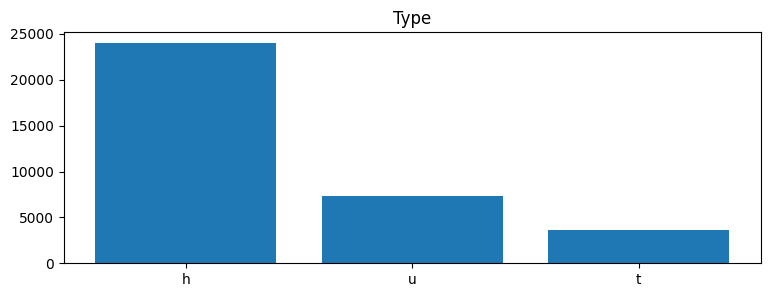

Type: 
 Type
h    23980
u     7297
t     3580
Name: count, dtype: int64


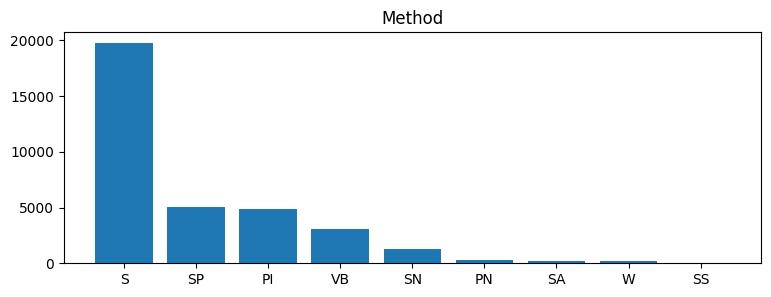

Method: 
 Method
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64


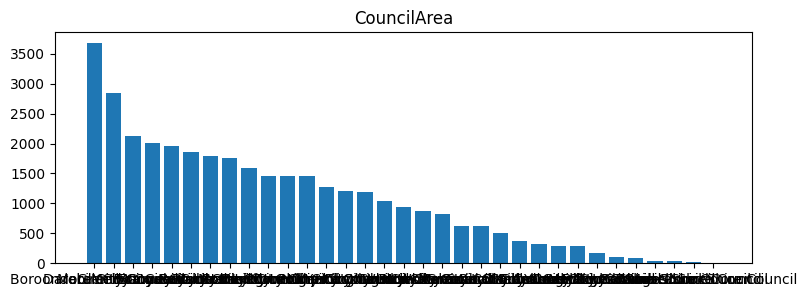

CouncilArea: 
 CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                29

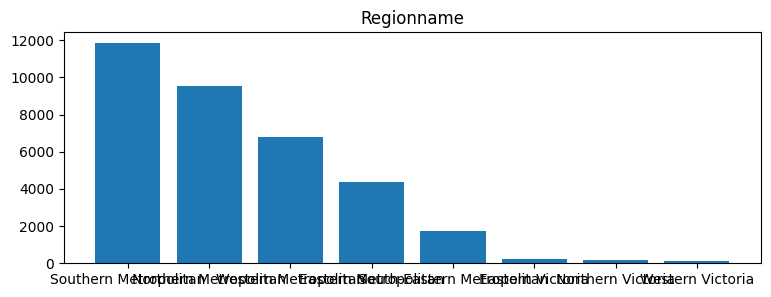

Regionname: 
 Regionname
Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64


In [13]:
categories1 = ['Type','Method','CouncilArea','Regionname']

for c in categories1:
    bar_plot(c)

In [14]:
categories2 = ['Suburb', 'Address', 'SellerG', 'Date']
for c in categories2:
    print("{} \n".format(df[c].value_counts))

<bound method IndexOpsMixin.value_counts of 0        Abbotsford
1        Abbotsford
2        Abbotsford
3        Abbotsford
4        Abbotsford
            ...    
34852    Yarraville
34853    Yarraville
34854    Yarraville
34855    Yarraville
34856    Yarraville
Name: Suburb, Length: 34857, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0             68 Studley St
1              85 Turner St
2           25 Bloomburg St
3        18/659 Victoria St
4              5 Charles St
                ...        
34852           13 Burns St
34853         29A Murray St
34854        147A Severn St
34855      12/37 Stephen St
34856      3 Tarrengower St
Name: Address, Length: 34857, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0               Jellis
1               Biggin
2               Biggin
3               Rounds
4               Biggin
             ...      
34852              Jas
34853          Sweeney
34854              Jas
34855    hockingstuart
34856            

<a id = '5'></a>
## Numerical Variable

In [15]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 25)
    plt.xlabel(variable)
    plt.title("{} disribution with hist".format(variable))
    plt.show()

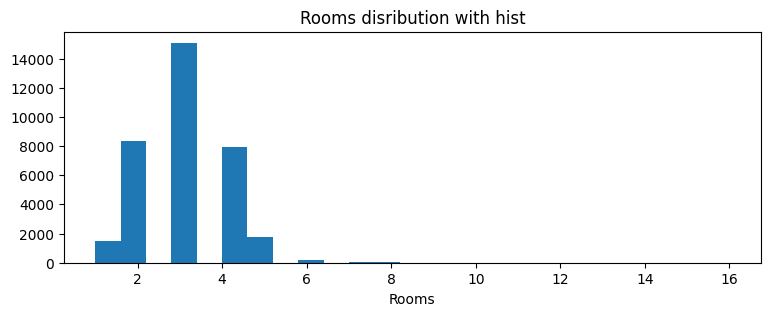

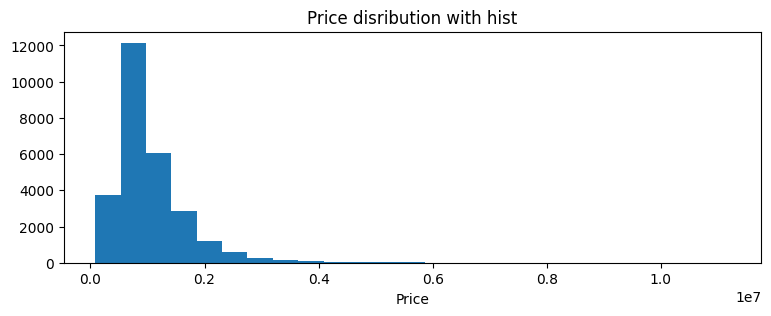

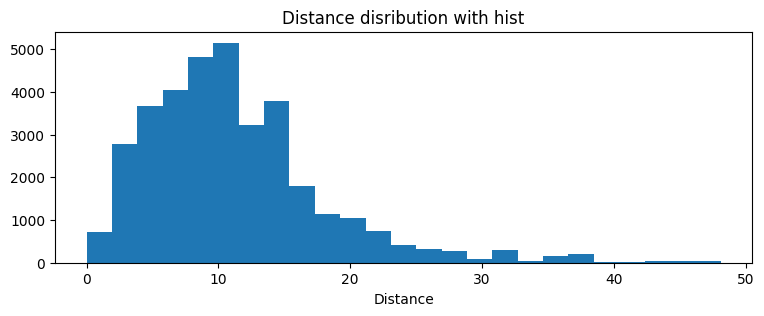

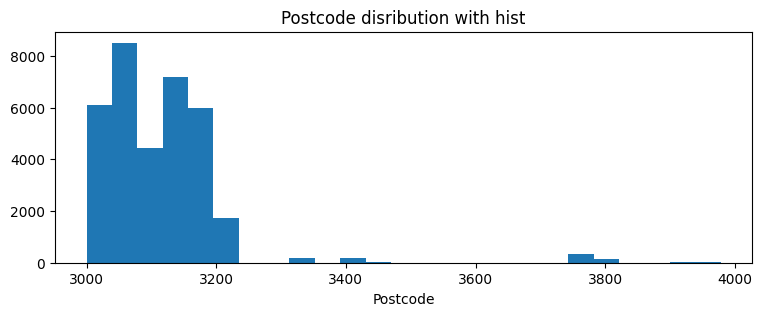

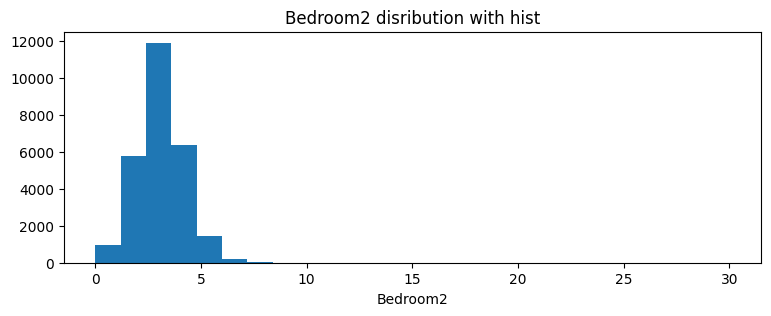

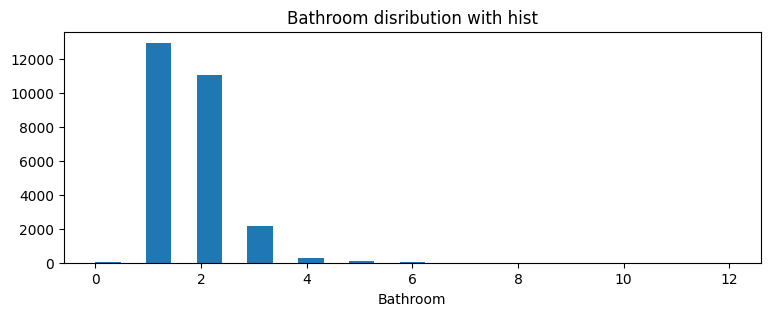

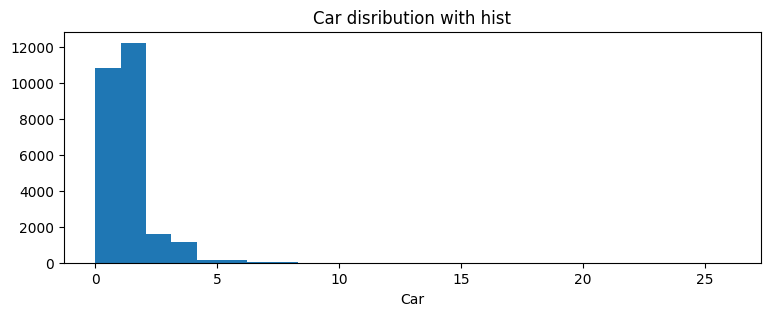

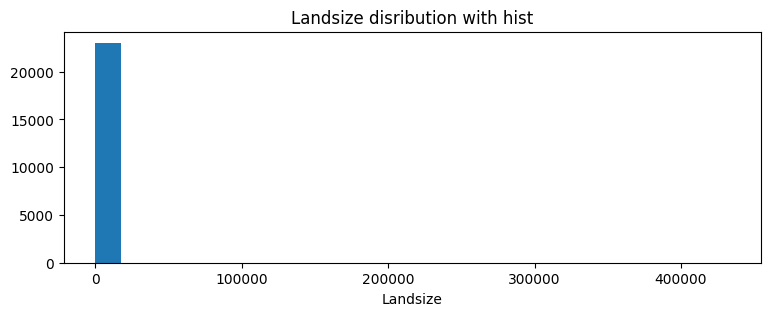

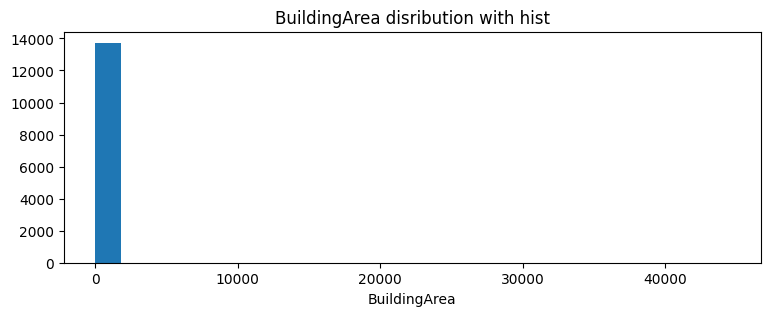

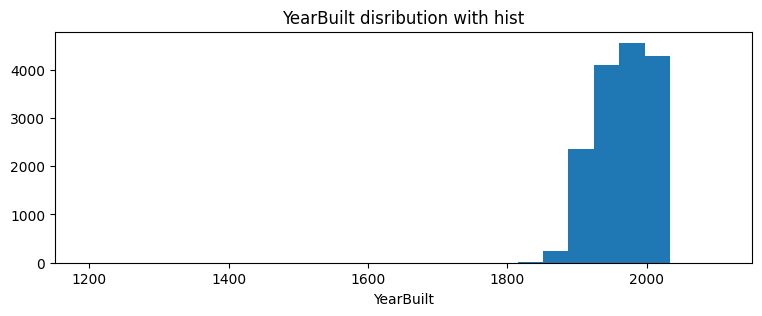

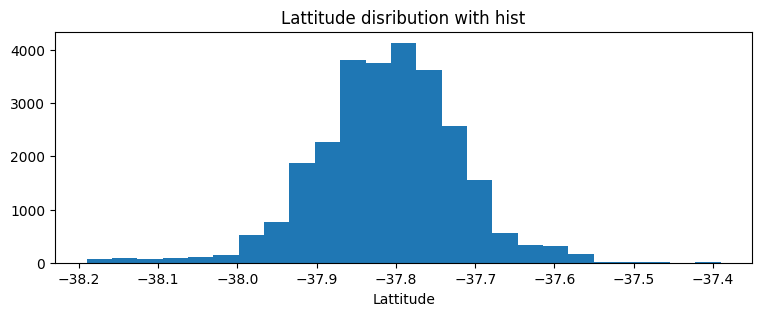

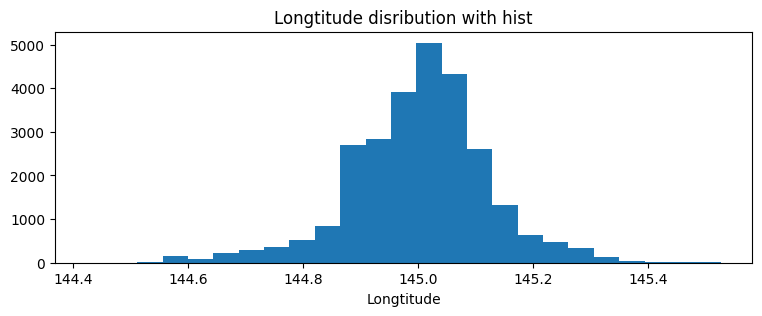

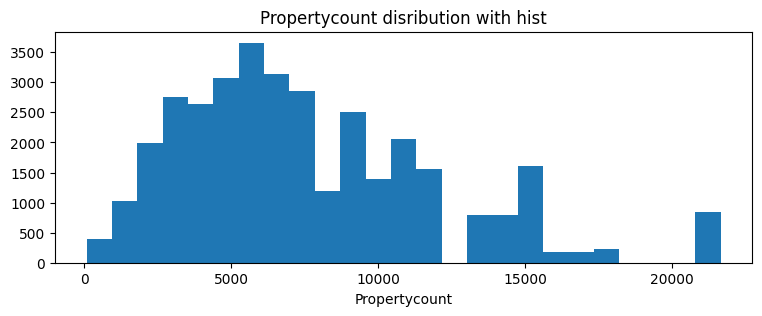

In [16]:
numericVar = ['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']

for n in numericVar:
    plot_hist(n)

<a id = '6'></a>
# Analysis Between Some Features

* Rooms - Price
* Bedroom2 - Price
* Bathroom - Price
* BuildingArea - Price
* Car - Price
* Type - Price

In [17]:
# Rooms - Price

df[["Rooms","Price"]].groupby(["Rooms"], as_index = False).mean().sort_values(by= "Price", ascending = False)

,Rooms,Price
11,16,5.000000e+06
10,12,2.705000e+06
9,10,2.018000e+06
5,6,1.882613e+06
4,5,1.818862e+06
6,7,1.791675e+06
7,8,1.716858e+06
8,9,1.380000e+06
3,4,1.369597e+06
2,3,1.028500e+06


In [18]:
# Bedroom2 - Price

df[["Bedroom2","Price"]].groupby(["Bedroom2"], as_index = False).mean().sort_values(by= "Price", ascending = False)

,Bedroom2,Price
12,16.0,5.000000e+06
6,6.0,1.902209e+06
5,5.0,1.833629e+06
7,7.0,1.797553e+06
13,20.0,1.650000e+06
10,10.0,1.603750e+06
9,9.0,1.487000e+06
4,4.0,1.376509e+06
8,8.0,1.332224e+06
3,3.0,1.051235e+06


In [19]:
# Bathroom - Price

df[["Bathroom","Price"]].groupby(["Bathroom"], as_index = False).mean().sort_values(by= "Price", ascending = False)

,Bathroom,Price
7,7.0,3.425000e+06
5,5.0,2.725152e+06
6,6.0,2.670100e+06
8,8.0,2.653333e+06
4,4.0,2.582449e+06
9,9.0,2.315000e+06
3,3.0,1.748276e+06
2,2.0,1.186950e+06
0,0.0,8.945588e+05
1,1.0,8.819075e+05


In [20]:
# BuildingArea - Price

df[["BuildingArea","Price"]].groupby(["BuildingArea"], as_index = False).mean().sort_values(by= "Price", ascending = False).head(20)

,BuildingArea,Price
621,464.3,8000000.0
686,638.0,5770000.0
648,516.0,5525000.0
646,513.0,5150000.0
625,470.0,4750000.0
536,367.0,4500000.0
622,465.0,4072000.0
618,461.0,4050000.0
612,449.0,4000000.0
445,279.0,3990000.0


In [21]:
# Car - Price

df[["Car","Price"]].groupby(["Car"], as_index = False).mean().sort_values(by= "Price", ascending = False)

,Car,Price
9,9.0,2.050000e+06
7,7.0,1.591895e+06
8,8.0,1.562722e+06
5,5.0,1.395898e+06
3,3.0,1.351374e+06
4,4.0,1.339290e+06
6,6.0,1.272805e+06
2,2.0,1.192691e+06
13,18.0,1.105000e+06
0,0.0,1.078869e+06


In [22]:
# Type - Price

df[["Type","Price"]].groupby(["Type"], as_index = False).mean().sort_values(by= "Price", ascending = False)

,Type,Price
0,h,1.203718e+06
1,t,9.310772e+05
2,u,6.279434e+05


<a id = '7'></a>
# Outlier Detection

Rooms               Axes(0.125,0.712609;0.168478x0.167391)
Price            Axes(0.327174,0.712609;0.168478x0.167391)
Distance         Axes(0.529348,0.712609;0.168478x0.167391)
Postcode         Axes(0.731522,0.712609;0.168478x0.167391)
Bedroom2            Axes(0.125,0.511739;0.168478x0.167391)
Bathroom         Axes(0.327174,0.511739;0.168478x0.167391)
Car              Axes(0.529348,0.511739;0.168478x0.167391)
Landsize         Axes(0.731522,0.511739;0.168478x0.167391)
BuildingArea         Axes(0.125,0.31087;0.168478x0.167391)
YearBuilt         Axes(0.327174,0.31087;0.168478x0.167391)
Lattitude         Axes(0.529348,0.31087;0.168478x0.167391)
Longtitude        Axes(0.731522,0.31087;0.168478x0.167391)
Propertycount           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

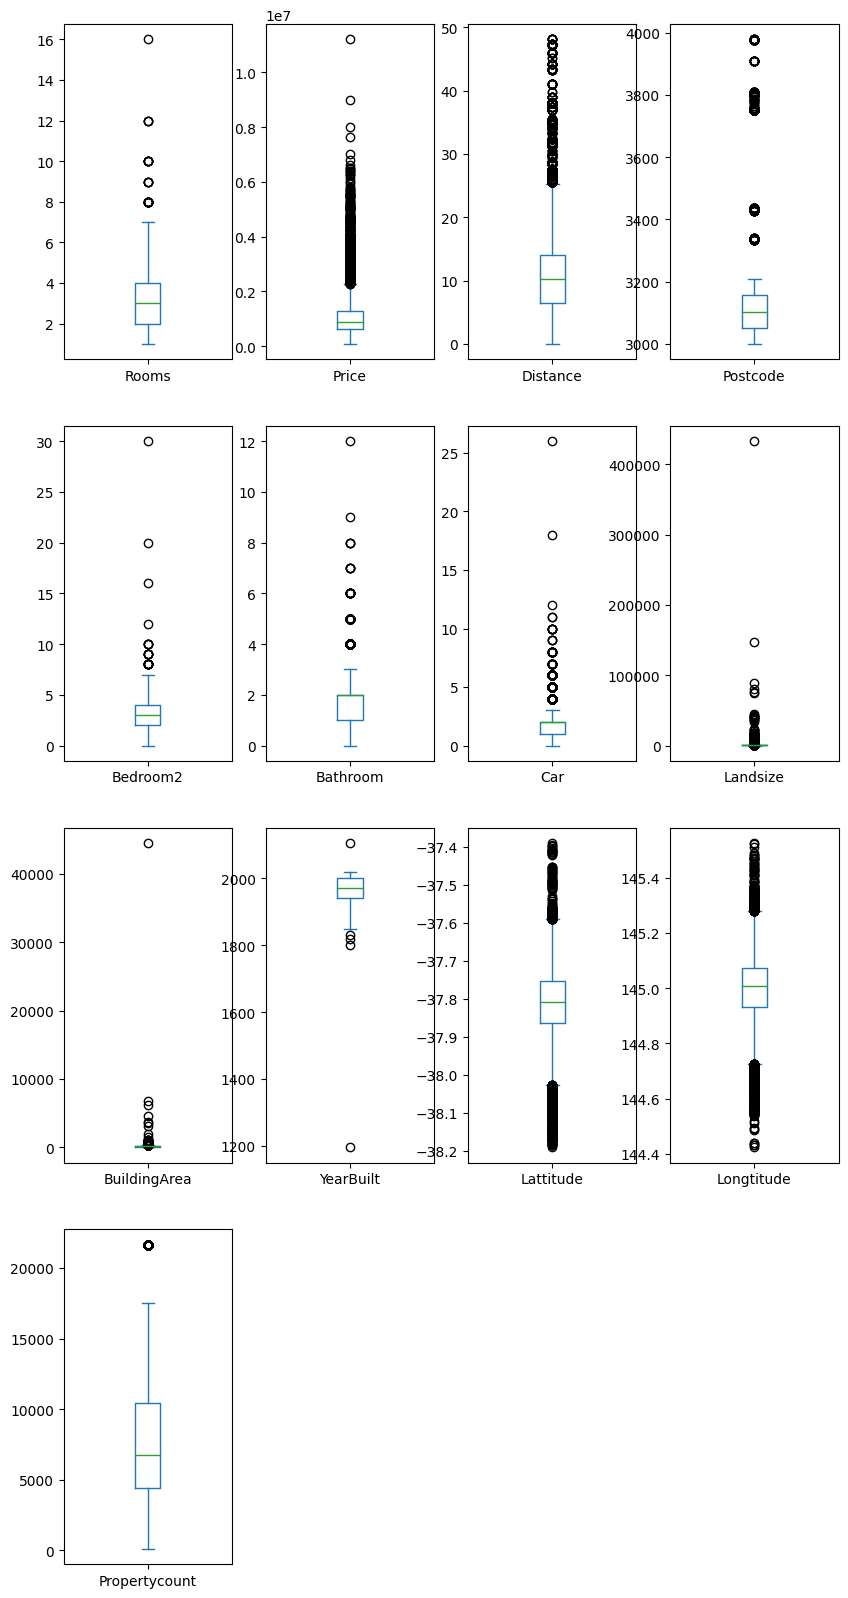

In [23]:
df.plot(kind ="box", subplots = True , figsize = (10,20), layout = (4,4))

In [24]:
def detect_zscore_outliers(df, features, threshold=3):
    outlier_indices = []

    for c in features:
        z_scores = np.abs(stats.zscore(df[c]))
        outlier_list_col = df[z_scores > threshold].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

    return outlier_indices

In [25]:
df.loc[detect_zscore_outliers(df, features=['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount'], threshold=3)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2560,Burwood,4 Ian Gr,7,h,NaN,PI,Ray,16/04/2016,11.7,3125.0,...,3.0,1.0,581.0,200.0,1965.0,Monash City Council,-37.85590,145.12080,Southern Metropolitan,5678.0
4608,Glen Iris,20 Charles St,6,h,2300000.0,S,Fletchers,14/05/2016,9.2,3146.0,...,2.0,2.0,0.0,NaN,NaN,Boroondara City Council,-37.85190,145.09100,Southern Metropolitan,10412.0
1026,Balwyn North,10 Carrington St,7,h,NaN,PI,Marshall,4/03/2017,9.2,3104.0,...,3.0,2.0,683.0,131.0,1960.0,Boroondara City Council,-37.80280,145.08460,Southern Metropolitan,7809.0
10242,Templestowe Lower,49 Feathertop Av,6,h,1363000.0,S,Jellis,28/08/2016,13.8,3107.0,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420.0
14341,Doncaster East,66 Saxonwood Dr,6,h,1856000.0,SP,Barry,1/07/2017,14.3,3109.0,...,3.0,3.0,1056.0,322.0,1970.0,Manningham City Council,-37.78053,145.15567,Eastern Metropolitan,10999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,Blackburn North,42 Junction Rd,6,h,1200000.0,VB,Noel,15/07/2017,13.4,3130.0,...,2.0,2.0,675.0,NaN,NaN,Whitehorse City Council,-37.80716,145.16504,Eastern Metropolitan,2867.0
26100,Kew,1 Belmont Av,6,h,NaN,S,Marshall,28/10/2017,5.4,3101.0,...,2.0,2.0,760.0,0.0,1957.0,Boroondara City Council,-37.80913,145.04210,Southern Metropolitan,10331.0
11767,West Footscray,1/12 Hatfield Ct,6,u,520000.0,SP,Sweeney,7/05/2016,8.2,3012.0,...,2.0,1.0,0.0,171.0,1970.0,Maribyrnong City Council,-37.80900,144.86860,Western Metropolitan,5058.0
1016,Balwyn North,30 Abbott St,7,h,1350000.0,PI,Barry,3/12/2016,9.2,3104.0,...,2.0,0.0,942.0,NaN,NaN,Boroondara City Council,-37.79230,145.10290,Southern Metropolitan,7809.0


In [26]:
# drop outliers

df = df.drop(detect_zscore_outliers(df, ['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']), axis = 0).reset_index(drop = True)

In [27]:
df.loc[detect_zscore_outliers(df, features=['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount'], threshold=3)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


<a id = '8'></a>
# Find and Fill the Missing Values

<a id = '9'></a>
## Find the Missing Values

In [28]:
df.columns[df.isnull().any()]

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [29]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7521
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8179
Bathroom          8188
Car               8686
Landsize         11736
BuildingArea     20969
YearBuilt        19170
CouncilArea          3
Lattitude         7944
Longtitude        7944
Regionname           3
Propertycount        3
dtype: int64

In [30]:
for i in df.columns:
    if df[i].isnull().any():
        nullperc = df[i].isnull().sum()/df[i].shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')

null percentage of Price is 21.745
null percentage of Distance is 0.003
null percentage of Postcode is 0.003
null percentage of Bedroom2 is 23.647
null percentage of Bathroom is 23.673
null percentage of Car is 25.113
null percentage of Landsize is 33.931
null percentage of BuildingArea is 60.625
null percentage of YearBuilt is 55.424
null percentage of CouncilArea is 0.009
null percentage of Lattitude is 22.968
null percentage of Longtitude is 22.968
null percentage of Regionname is 0.009
null percentage of Propertycount is 0.009


* BuildingArea is 60.625
* YearBuilt is 55.424

Since more than half of these two features are missing, I delete them from my data.

In [31]:
df.drop(['BuildingArea', 'YearBuilt'], axis = 1, inplace = True)

In [32]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<a id = '10'></a>
## Fill the Missing Values

In [33]:
df=df.interpolate(method='linear')

In [34]:
categorical_columns = ['Type', 'Method', 'CouncilArea', 'Regionname', 'Suburb', 'Address', 'SellerG', 'Date']

In [35]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            1
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

In [36]:
df[df['Price'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0


In [37]:
df.dropna(subset=['Price'], inplace = True)

In [38]:
df[df['Regionname'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18388,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,3.500000,2.000000,2.0,2195.0,NaN,-37.826830,145.038365,NaN,5977.5
26683,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,3.333333,1.666667,2.0,1027.5,NaN,-37.839433,145.088500,NaN,8920.0
29259,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,13.1,3060.0,2.500000,1.000000,1.5,584.0,NaN,-37.708325,144.964025,NaN,5070.0


In [39]:
df.dropna(subset=['Regionname'], inplace = True)

In [40]:
df[df['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [41]:
df.dropna(subset=['CouncilArea'], inplace = True)

<a id = '11'></a>
# Visualization

In [42]:
numeric_col = ['Rooms','Price','Distance','Postcode','Bedroom2','Car','Bathroom','Lattitude','Longtitude','Propertycount']

<Axes: xlabel='Price', ylabel='Count'>

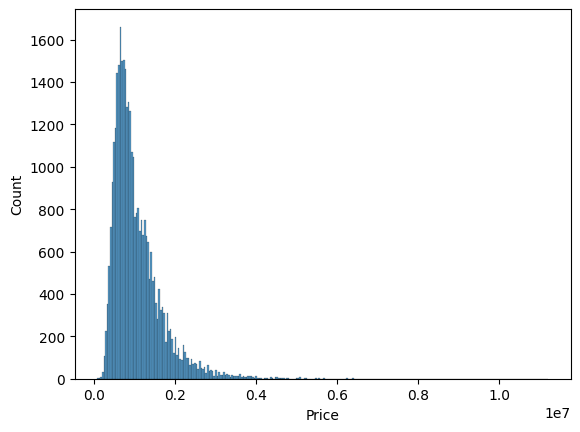

In [43]:
sns.histplot(x =df['Price'])

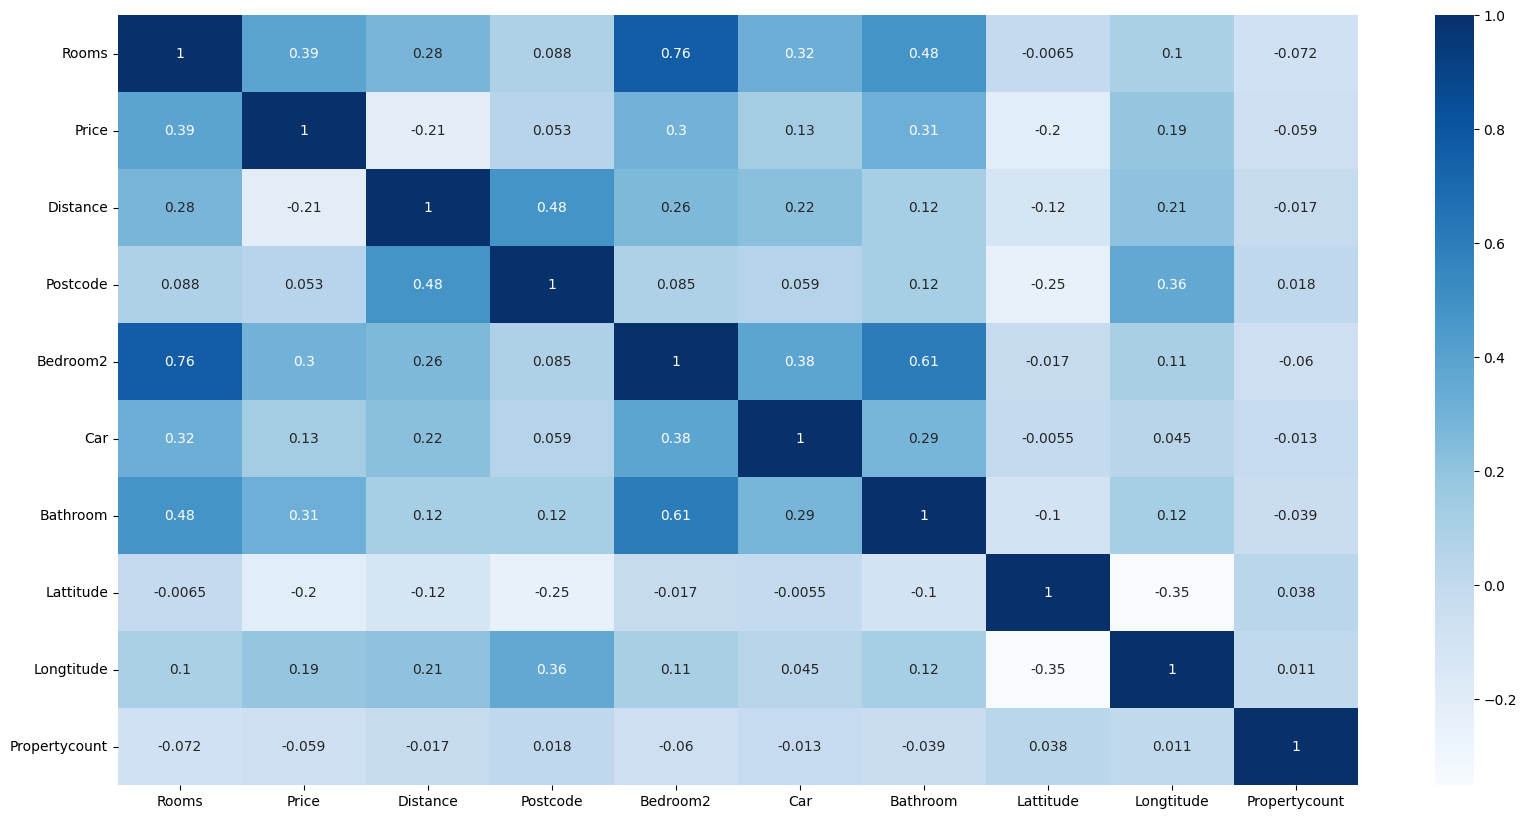

In [44]:
corr = df[numeric_col].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

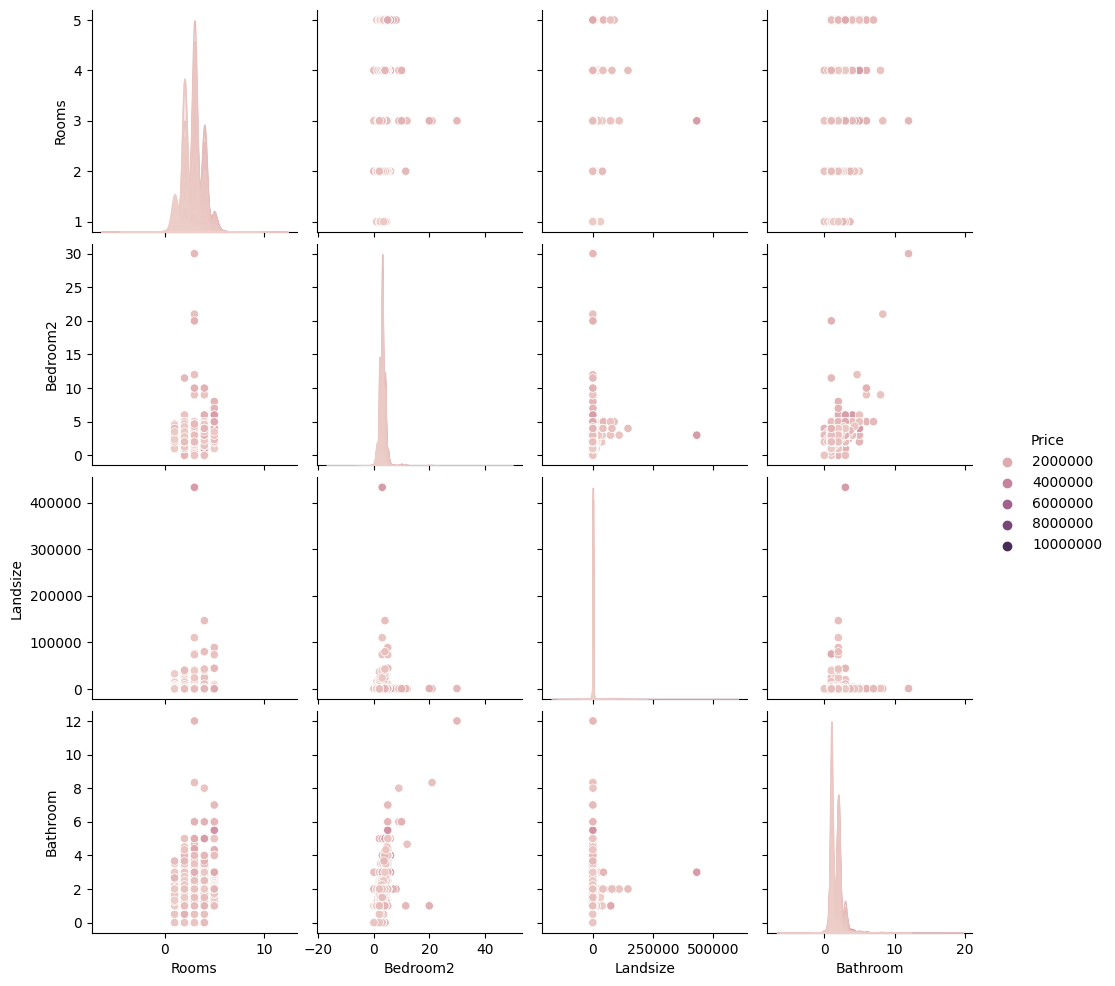

In [45]:
sns.pairplot(df[['Rooms', 'Bedroom2', 'Price', 'Landsize', 'Bathroom']], hue = 'Price')
plt.show()

<a id = '12'></a>
# Encoding the Data

In [46]:
def one_hot_encoder(dataframe, drop_first=True):

    ohe_cols = [
        col for col in dataframe.columns
        if dataframe[col].dtype == 'object' and 2 < dataframe[col].nunique() <= 12
    ]
    
    dataframe = pd.get_dummies(dataframe, columns=ohe_cols, drop_first=drop_first)
    
    return dataframe

df = one_hot_encoder(df, drop_first=True)

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

In [48]:
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0,32274,2,1480000.0,33,60,2.5,3067.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
2,0,15274,2,1035000.0,33,63,2.5,3067.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
3,0,9689,3,1250000.0,295,63,2.5,3067.0,3.0,2.0,...,False,True,False,False,True,False,False,False,False,False
4,0,24945,3,1465000.0,33,64,2.5,3067.0,3.0,2.0,...,False,False,False,False,True,False,False,False,False,False
5,0,23039,3,850000.0,33,64,2.5,3067.0,3.0,2.0,...,False,False,False,False,True,False,False,False,False,False


<a id = '13'></a>
# Model Training

In [49]:
y = df['Price']
X = df.drop('Price', axis = 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (27667, 32)
Shape of x_test is (6917, 32)
Shape of y_train is (27667,)
Shape of y_test is (6917,)


In [52]:
models = { 
    'Lasso': {'model': Lasso() },
    'LinearRegression': {'model': LinearRegression()}, 
    'Ridge': {'model': Ridge() },
    'ElasticNet': {'model': ElasticNet()}, 
    'KNeighborsRegressor': {'model': KNeighborsRegressor() },
    'RandomForestRegressor': {'model': RandomForestRegressor()}, 
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor() },
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}
}

In [53]:
for model_name, model_info in models.items():
   model = model_info['model']
   model.fit(X_train, y_train)  # Fit the model on the training data
   y_pred = model.predict(X_test)  # Make predictions on the test data
   r2 = r2_score(y_test, y_pred)  # Calculate R2 score
   print(f'{model_name} R2 Score: {r2:.4f}')

Lasso R2 Score: 0.4602
LinearRegression R2 Score: 0.4602
Ridge R2 Score: 0.4603
ElasticNet R2 Score: 0.3661
KNeighborsRegressor R2 Score: 0.1319
RandomForestRegressor R2 Score: 0.6071
GradientBoostingRegressor R2 Score: 0.5762
AdaBoostRegressor R2 Score: 0.3681
